# Goal: reconstruct ephemeris, provided the required coefficients:
- weight seed
- bias seed
- amplitudes

### Imports

In [18]:
#utilities
import numpy as np 
import pandas as pd
# pd.set_option('display.max_colwidth', -1)
import matplotlib.pyplot as plt
import seaborn as sns
seaborn_blue = (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
seaborn_orange = (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
seaborn_green = (0.3333333333333333, 0.6588235294117647, 0.40784313725490196)
sns.set()
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 
import itertools
from tqdm import tqdm
import time

from sklearn.metrics import mean_squared_error,max_error

import warnings
# warnings.simplefilter(action='ignore', category=FutureWarning)
# warnings.filterwarnings('ignore')


sns.set()
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 

plt.rcParams['figure.figsize'] = (15, 8)

sns.set_style("ticks",{"axes.facecolor":'white'})
sns.set_context("paper",font_scale=2.3)
from scipy.linalg import pinv2
from weighted_elm import *


### 2) Read Data from file

In [19]:
rescaled_T=np.linspace(-1,1,96).reshape(-1,1) #just as showcase

In [24]:
c=np.load("elm_coeffs.npz")
A=c["A"]
ws=c["ws"]
bs=c["bs"]

In [25]:
np.random.seed(ws)
W=np.random.normal(0,len(A)//2,len(A)).reshape(-1,1)

np.random.seed(bs)
b=np.random.normal(0,len(A)//2,len(A)).reshape(-1,1)

Htemp = np.dot(W, rescaled_T.T) + b
H=np.sin(Htemp)
out=np.dot(H.T,A) #resconstructed ephemeris in km

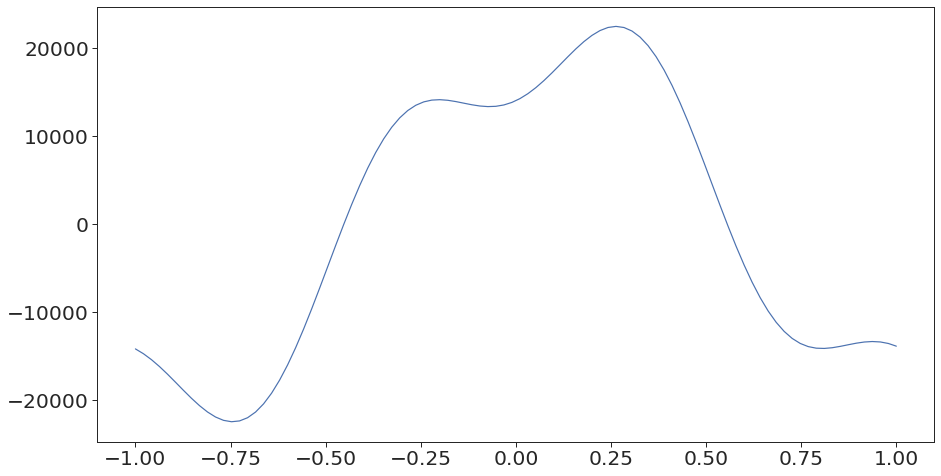

In [26]:
plt.plot(rescaled_T,out)